In [1]:
import os
import numpy as np
import pandas as pd
import mne
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [ ]:
path = '/crnldata/cophy/TeamProjects/mohammad/ibl-oscillations/_analyses/_IBLworkflows/preprocessing/clean_data.csv'
df = pd.read_csv(path)
df = df[df['pid'] != 'b72b22c2-6e9d-4604-9910-20c0e1a467d7']
pids = df['pid'].values
all_removed_percent = []
all_subjects_filtered = []
for pid in pids:
    data_dir = f'/mnt/data/AdaptiveControl/IBLrawdata/pid_data/{pid}/metadata.csv'
    data = pd.read_csv(data_dir)
    filtered_data = data[data['skewness'] < 1.5]
    filtered_data['pid'] = pid * len(filtered_data)
    filtered_data['RT'] = filtered_data['response_times'] - filtered_data['stimOn_times']
    filtered_data['stimoff'] = filtered_data['stimOff_times'] - filtered_data['stimOn_times']
    removed_percent = ((len(data) - len(filtered_data)) / len(data)) * 100
    all_removed_percent.append(removed_percent)
    all_subjects_filtered.append(filtered_data)
all_data = pd.concat(all_subjects_filtered)
all_data.to_csv('trials_data.csv')

Text(0.5, 1.0, 'Percentage of removed trials for each subject absed on skewness')

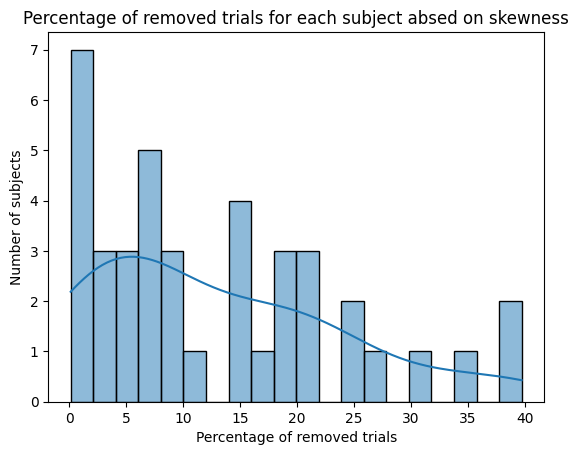

In [31]:
sns.histplot(all_removed_percent, kde=True, bins=20)
plt.xlabel('Percentage of removed trials')
plt.ylabel('Number of subjects')
plt.title('Percentage of removed trials for each subject absed on skewness')

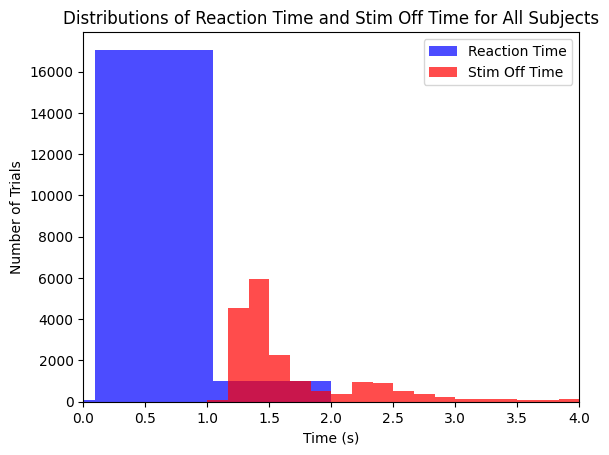

(3186, 21350, 2319, 21350)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

all_data = pd.read_csv('trials_data.csv')

# Data preparation
RT = all_data['RT']
RT_clean = RT[RT < 2]
num_trials_exceeded_RT = len(RT) - len(RT_clean)

stimoff = all_data['stimoff']
stimoff_clean = stimoff[stimoff < 5]
num_trials_exceeded_stimoff = len(stimoff) - len(stimoff_clean)

# Plotting both distributions in one plot with two colors and legend
fig, ax = plt.subplots()
ax.hist(RT_clean, bins=30, alpha=0.7, label='Reaction Time', color='blue')
ax.hist(stimoff_clean, bins=30, alpha=0.7, label='Stim Off Time', color='red')
ax.set_xlim(0, 4)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Number of Trials')
ax.set_title('Distributions of Reaction Time and Stim Off Time for All Subjects')
ax.legend()

plt.show()
num_trials_exceeded_RT, len(RT), num_trials_exceeded_stimoff, len(stimoff)


number of trials with RT > 2s: 0 total number of trials: 21350


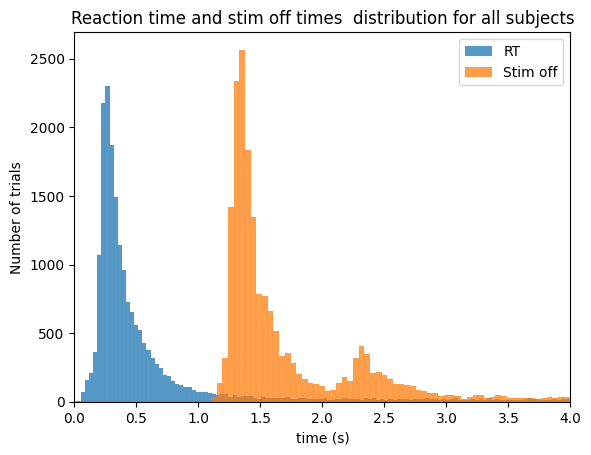

In [56]:
RT = all_data['RT'] 
RT_clean = RT
print(f'number of trials with RT > 2s: {len(RT) - len(RT_clean)} total number of trials: {len(RT)}')
sns.histplot(RT_clean)
stimoff = all_data['stimoff']
stimoff_clean = stimoff[stimoff < 5]
sns.histplot(stimoff_clean)
plt.xlim(0, 4)
plt.xlabel('time (s)')
plt.ylabel('Number of trials')
plt.title('Reaction time and stim off times  distribution for all subjects')
plt.legend(['RT', 'Stim off'])

Text(0.5, 1.0, 'Stimulus duration distribution for all subjects')

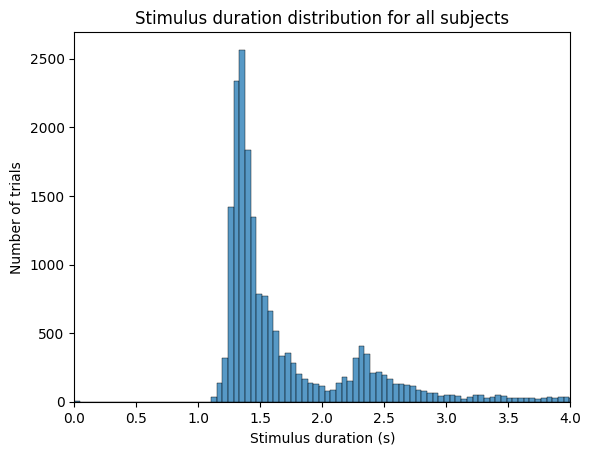

In [28]:
stimoff = all_data['stimOff_times'] - all_data['stimOn_times']
stimoff_clean = stimoff[stimoff < 5]
sns.histplot(stimoff_clean)
plt.xlim(0, 4)
plt.xlabel('Stimulus duration (s)')
plt.ylabel('Number of trials')
plt.title('Stimulus duration distribution for all subjects')

In [4]:
contrasts = [0, 0.0625, 0.125, 0.25,  1]
all_rt = []
all_performance = []
for pid in all_data['pid'].unique():
    data = all_data[all_data['pid'] == pid]
    rt_contrast = []
    performance_contrast = []
    for contrast in contrasts:
        data_contrast = data[(data['contrastLeft'] == contrast) | (data['contrastRight'] == contrast)]
        if len(data_contrast) == 0:
            print(f'No trials for contrast {contrast} for subject {pid}')
            continue
        rt = data_contrast['RT'].mean()
        performance = len(data_contrast[data_contrast['feedbackType'] == 1]) / len(data_contrast) * 100
        rt_contrast.append(rt)
        performance_contrast.append(performance)
    all_rt.append(rt_contrast)
    all_performance.append(performance_contrast)
    
all_rt = np.array(all_rt)
all_performance = np.array(all_performance)


In [6]:
print(all_data['RT'].mean())
print(all_data['RT'].std())

1.7389293419786067
5.364780611282227


Text(0.5, 1.0, 'Performance for each contrast')

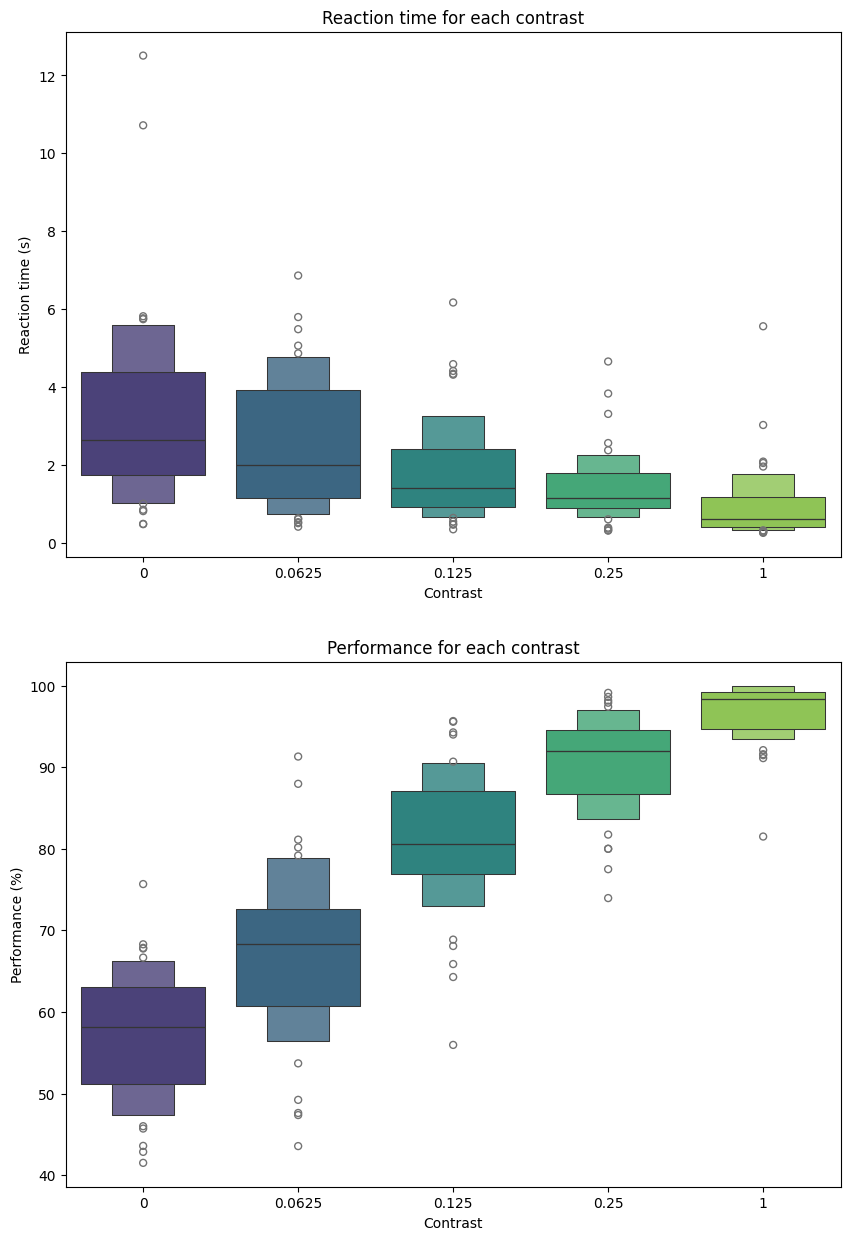

In [46]:
fig, ax = plt.subplots(2, 1, figsize=(10, 15))
sns.boxenplot(data=all_rt, palette='viridis', ax=ax[0])
ax[0].set_xticks(range(5))
ax[0].set_xticklabels(contrasts)
ax[0].set_xlabel('Contrast')
ax[0].set_ylabel('Reaction time (s)')
ax[0].set_title('Reaction time for each contrast')
sns.boxenplot(data=all_performance, palette='viridis', ax=ax[1])
ax[1].set_xticks(range(5))
ax[1].set_xticklabels(contrasts)
ax[1].set_xlabel('Contrast')
ax[1].set_ylabel('Performance (%)')
ax[1].set_title('Performance for each contrast')




/tmp/ipykernel_485126/2029409634.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Contrast', y='RT', data=rt_df_melted, palette='inferno_r')


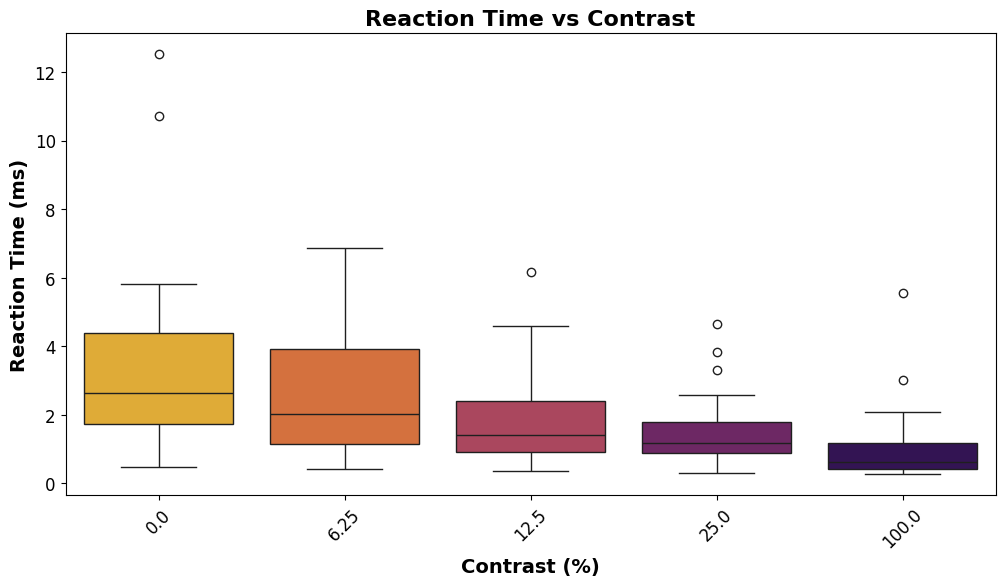

/tmp/ipykernel_485126/2029409634.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Contrast', y='Performance', data=performance_df_melted, palette='inferno_r')


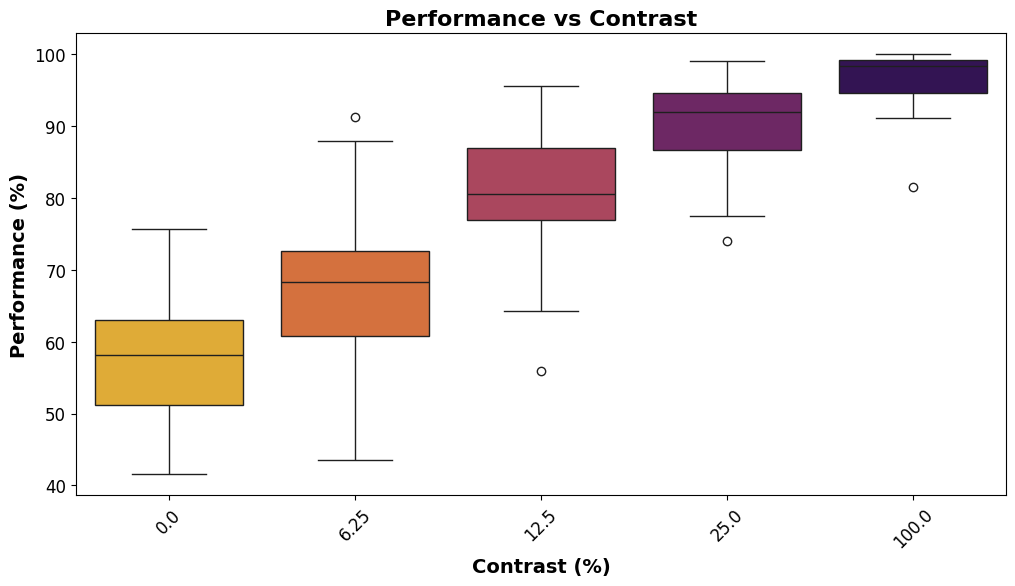

In [14]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the previous code has been run and all_rt and all_performance are populated
# We will now create a DataFrame for easy plotting

# Convert the arrays into DataFrames
rt_df = pd.DataFrame(all_rt, columns=contrasts)
performance_df = pd.DataFrame(all_performance, columns=contrasts)

# Melt the DataFrames for easier plotting with Seaborn
rt_df_melted = rt_df.melt(var_name='Contrast', value_name='RT')
performance_df_melted = performance_df.melt(var_name='Contrast', value_name='Performance')

# Convert the contrasts into percentages for x-axis ticks
rt_df_melted['Contrast'] = rt_df_melted['Contrast'] * 100
performance_df_melted['Contrast'] = performance_df_melted['Contrast'] * 100

# Plotting RT
plt.figure(figsize=(12, 6))
sns.boxplot(x='Contrast', y='RT', data=rt_df_melted, palette='inferno_r')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.xlabel('Contrast (%)', fontsize=14, fontweight='bold')
plt.ylabel('Reaction Time (ms)', fontsize=14, fontweight='bold')
plt.title('Reaction Time vs Contrast', fontsize=16, fontweight='bold')
plt.show()

# Plotting Performance
plt.figure(figsize=(12, 6))
sns.boxplot(x='Contrast', y='Performance', data=performance_df_melted, palette='inferno_r')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.xlabel('Contrast (%)', fontsize=14, fontweight='bold')
plt.ylabel('Performance (%)', fontsize=14, fontweight='bold')
plt.title('Performance vs Contrast', fontsize=16, fontweight='bold')
plt.show()


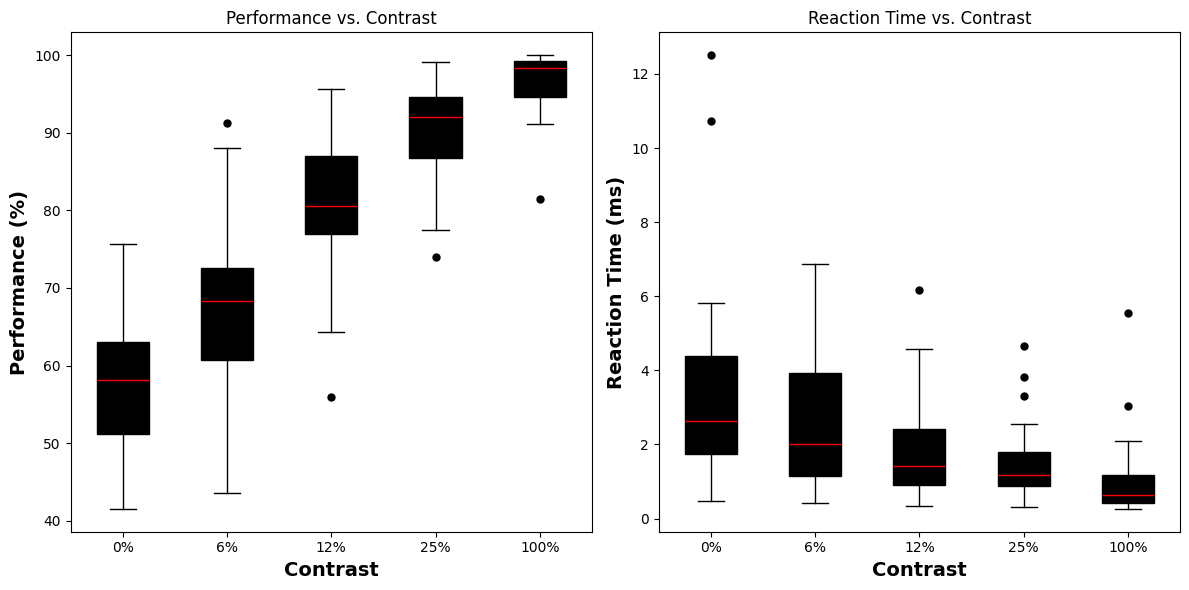

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Set transparency values for different contrasts
transparencies = [1, 1, 1, 1, 1]

# Create the figure with two subplots (two columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for performance
for i, contrast in enumerate(contrasts):
    # Collect the data for this contrast across all participants
    performance_data = all_performance[:, i]
    
    # Create a boxplot
    ax1.boxplot(performance_data, positions=[i], widths=0.5,
                patch_artist=True,
                boxprops=dict(facecolor=(0, 0, 0, transparencies[i]), color='black'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'),
                flierprops=dict(markerfacecolor='black', marker='o', markersize=5, alpha=transparencies[i]))
    
# Set labels and title for performance plot
ax1.set_xticks(range(len(contrasts)))
ax1.set_xticklabels([f'{int(c*100)}%' for c in contrasts])

ax1.set_xlabel('Contrast', fontsize=14, fontweight='bold')
ax1.set_ylabel('Performance (%)', fontsize=14, fontweight='bold')
ax1.set_title('Performance vs. Contrast')

# Box plot for reaction time (RT)
for i, contrast in enumerate(contrasts):
    # Collect the data for this contrast across all participants
    rt_data = all_rt[:, i]
    
    # Create a boxplot
    ax2.boxplot(rt_data, positions=[i], widths=0.5,
                patch_artist=True,
                boxprops=dict(facecolor=(0, 0, 0, transparencies[i]), color='black'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'),
                flierprops=dict(markerfacecolor='black', marker='o', markersize=5, alpha=transparencies[i]))

# Set labels and title for RT plot
ax2.set_xticks(range(len(contrasts)))
ax2.set_xticklabels([f'{int(c*100)}%' for c in contrasts])
ax2.set_xlabel('Contrast', fontsize=14, fontweight='bold')
ax2.set_ylabel('Reaction Time (ms)', fontsize=14, fontweight='bold')
ax2.set_title('Reaction Time vs. Contrast')

# Adjust layout to make sure the plots don't overlap
plt.tight_layout()

# Show the combined plot
plt.show()